In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data viz
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns




# Viz Styling
plt.style.use('ggplot')
rcParams['figure.figsize'] = (12,  6)
pd.set_option('display.max_columns',50)

## Importing

In [2]:
trips = pd.read_excel('data/RAW-2019-Chevy-Bolt-Trip-Data.xlsx')

trips.head()
# testing comment

,Vehicle Model,Start Date,End Date,Duration,Distance (mi),Gasoline Consumed (gal),Electricity Consumed (kWh),Fuel Efficiency Equivalent (MPGeq),mi/kWh,Starting SOC (%),Ending SOC (%),Ambient Temperature (F),Smooth Acceleration (%),Smooth Braking (%)
0,2019 Chevrolet Bolt EV,2022-02-24 08:25:56,2022-02-24 09:32:13,01:06:17,45.54,NaN,12.64,121.44,3.602848,0.00,0.00,31.81,NaN,NaN
1,2019 Chevrolet Bolt EV,2022-02-24 09:34:42,2022-02-24 09:35:32,00:00:50,0.00,NaN,0.03,NaN,0.000000,53.72,53.72,34.07,NaN,NaN
2,2019 Chevrolet Bolt EV,2022-02-24 16:05:49,2022-02-24 16:06:21,00:00:32,0.00,NaN,0.05,NaN,0.000000,53.72,56.08,62.60,NaN,NaN
3,2019 Chevrolet Bolt EV,2022-02-24 18:00:42,2022-02-24 19:06:38,01:05:56,45.57,NaN,13.19,116.46,3.454890,56.08,32.16,36.96,NaN,NaN
4,2019 Chevrolet Bolt EV,2022-02-26 09:50:22,2022-02-26 10:03:52,00:13:30,5.36,NaN,1.67,108.13,3.209581,77.26,74.51,30.52,NaN,NaN


In [3]:
# Finding null columns
np.sum(~trips.isnull())

Vehicle Model                         1090
Start Date                            1090
End Date                              1090
Duration                              1090
Distance (mi)                         1090
Gasoline Consumed (gal)                  0
Electricity Consumed (kWh)            1088
Fuel Efficiency Equivalent (MPGeq)    1003
mi/kWh                                1090
Starting SOC (%)                      1090
Ending SOC (%)                        1090
Ambient Temperature (F)                918
Smooth Acceleration (%)                  0
Smooth Braking (%)                       0
dtype: int64

## Cleaning

In [4]:
trips.columns

Index(['Vehicle Model', 'Start Date', 'End Date', 'Duration', 'Distance (mi)',
       'Gasoline Consumed (gal)', 'Electricity Consumed (kWh)',
       'Fuel Efficiency Equivalent (MPGeq)', 'mi/kWh', 'Starting SOC (%)',
       'Ending SOC (%)', 'Ambient Temperature (F)', 'Smooth Acceleration (%)',
       'Smooth Braking (%)'],
      dtype='object')

In [5]:
# Removing Null Columns and irrelivant columns
trips.drop(labels = ['Vehicle Model', r'Gasoline Consumed (gal)'\
                     , r'Smooth Acceleration (%)', r'Smooth Braking (%)'], axis = 1, inplace = True)

In [6]:
# Removing 0.00 mile trips (i.e. I turned on the car for a minute, but didn't go anywhere)
trips = trips.loc[trips[r'Distance (mi)'] != 0 ,:]


In [7]:
# converting SOC columns to percentage values (/100)
trips[r'Starting SOC (%)'] = trips[r'Starting SOC (%)']/100
trips[r'Ending SOC (%)'] = trips[r'Ending SOC (%)']/100

In [8]:
# Appending Columns to provide additional Analysis
# Projected Mile Range at Star and end of trip
# Using the formula (mi/kWh)*(SOC*battery size)
# battery size is 66kWh
battery_size = 66

trips['start_range'] = trips['mi/kWh']*(trips[r'Starting SOC (%)']*battery_size)
trips['end_range'] = trips['mi/kWh']*(trips[r'Ending SOC (%)']*battery_size)

In [9]:
# Rename column names
trips = trips.rename(columns = {r'Start Date' : 'start_date',
           r'End Date' : 'end_date',
           r'Duration' : 'duration',
           r'Distance (mi)' : 'distance',
           r'Electricity Consumed (kWh)' : 'electricity_used',
           r'mi/kWh' : 'mikWh',
           r'Fuel Efficiency Equivalent (MPGeq)' : 'MPGe',
           r'Starting SOC (%)' : 'start_soc',
           r'Ending SOC (%)' : 'end_soc',
           r'Ambient Temperature (F)' : 'temp',
          }
         )

# write CLEAN data back to data folder

# address NULL values appropriately

# Correct duration object

In [10]:
trips.info() # correct date time format was read in, but duration isn't supposed to be object!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 1089
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   start_date        989 non-null    datetime64[ns]
 1   end_date          989 non-null    datetime64[ns]
 2   duration          989 non-null    object        
 3   distance          989 non-null    float64       
 4   electricity_used  988 non-null    float64       
 5   MPGe              989 non-null    float64       
 6   mikWh             989 non-null    float64       
 7   start_soc         989 non-null    float64       
 8   end_soc           989 non-null    float64       
 9   temp              836 non-null    float64       
 10  start_range       989 non-null    float64       
 11  end_range         989 non-null    float64       
dtypes: datetime64[ns](2), float64(9), object(1)
memory usage: 100.4+ KB


# LOOK FOR A PATTERN AS TO WHY their are so many null values. maybe its a pattern of too cold, or too early

# Morning vs afternoon versus evening data?

In [11]:
trips

,start_date,end_date,duration,distance,electricity_used,MPGe,mikWh,start_soc,end_soc,temp,start_range,end_range
0,2022-02-24 08:25:56,2022-02-24 09:32:13,01:06:17,45.54,12.64,121.44,3.602848,0.0000,0.0000,31.81,0.000000,0.000000
3,2022-02-24 18:00:42,2022-02-24 19:06:38,01:05:56,45.57,13.19,116.46,3.454890,0.5608,0.3216,36.96,127.875155,73.332115
4,2022-02-26 09:50:22,2022-02-26 10:03:52,00:13:30,5.36,1.67,108.13,3.209581,0.7726,0.7451,30.52,163.661662,157.836273
5,2022-02-26 10:04:49,2022-02-26 10:12:17,00:07:28,3.34,0.97,116.10,3.443299,0.7451,0.7294,28.45,169.329736,165.761790
6,2022-02-26 10:28:40,2022-02-26 10:31:18,00:02:38,0.45,0.18,84.94,2.500000,0.7294,0.7216,28.40,120.351000,119.064000
...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2022-11-29 07:59:27,2022-11-29 08:25:02,00:25:35,17.60,5.89,100.71,2.988115,1.0000,0.8980,35.67,197.215620,177.099626
1086,2022-11-29 15:38:54,2022-11-29 16:12:07,00:33:13,14.31,4.03,119.67,3.550868,0.8980,0.8392,39.10,210.452873,196.672663
1087,2022-11-29 18:09:27,2022-11-29 18:58:13,00:48:46,33.47,9.83,114.76,3.404883,0.8392,0.6706,35.00,188.586936,150.698760
1088,2022-11-30 08:17:23,2022-11-30 08:45:27,00:28:04,17.47,5.57,105.74,3.136445,1.0000,0.9058,41.45,207.005386,187.505479


## Data Summary

In [12]:
trips.describe()

,distance,electricity_used,MPGe,mikWh,start_soc,end_soc,temp,start_range,end_range
count,989.000000,988.000000,989.000000,989.000000,989.000000,989.000000,836.000000,989.000000,989.000000
mean,16.041436,3.953360,150.096067,4.451305,0.724904,0.660718,63.728349,212.925295,195.673486
std,23.149422,5.637641,186.591402,5.522135,0.166861,0.188289,15.602551,277.482991,279.075408
min,0.010000,-0.030000,-407.000000,-12.000000,0.000000,0.000000,23.420000,-555.984000,-555.984000
25%,1.750000,0.410000,108.380000,3.215341,0.643200,0.560800,51.422500,139.164212,117.219106
50%,5.610000,1.350000,132.280000,3.933333,0.745100,0.686200,65.390000,190.430480,168.576384
75%,18.280000,5.355000,165.660000,4.914768,0.819600,0.764700,76.120000,250.611881,232.102812
max,177.480000,42.320000,5374.050000,159.000000,1.000000,1.000000,97.290000,7983.835200,7983.835200


In [13]:
# trips.loc[trips.Ambient Temperature (F) == 'NaN',:]

# QUICK NOTE DATA is SKEWED a little warmer because it does not have a FULL year of Data, I am missing December and January wwhich are COLDER months. 

## Initial Quick Analysis

The data has XXX amount of trips taken. FILL IN ONCE FINAL DATA SETE IS TAKEN

This data takes place in the <u>**temp range 23-97&deg;F**</u>

In [14]:
print(trips.temp.min())
print(trips.temp.max())

23.42
97.29


Avg trip <u>**distance**</u> is 15.5 mi

In [15]:
trips.distance.mean()

16.041435793731043

An average trip uses <u>**3.88 kWh of energy**</u>.

This represents <u>**5.8%**</u> of the 66kWh Battery's capacity. 

This means if the battery is charged to 100%, on average a Chevy Bolt owner could get <u>**16 trips out of single charge.**</u> 

However, This is unrealistic because you shouldn't start a trip with less than 10%. In my dataset I started a trip with less than 10% <u>**2 times**</u> and ended a trip with less than 10% <u>**4 times**</u>. You also shouldn't really charge past 80% of the capcity. I did this <u>**109 times**</u>. ...Whoops.

So following all the best practices you are looking at an AVG of 11 trips of 15.5mi(3.88 kWh) each per responsible Charge. 

In [16]:
print(trips.electricity_used.mean()/66)
print(66//trips.electricity_used.mean())
print((66*.7)//trips.electricity_used.mean())
print(trips.loc[trips['start_soc']<.10,'distance'].count()) # amount of times I started a trip with less than 10%
print(trips.loc[trips['end_soc']<.10,'distance'].count()) # amount of times I ended a trip with less than 10%
print(trips.loc[trips['start_soc']>.80,'distance'].count()) # amount of times I started a trip with more than 80%

0.059899398846767316
16.0
11.0
3
8
286


11, 15 miles trips sounds suffecient to me, but there are definetly a lot of consumers that would feel that isn't enough 

***INSERT AVG USA TRIP DATA:
AVG trip length
etc.***

However, the interesting thing to most consumers, is that this actually ***DOES NOT*** matter. 

The BIGGEST difference between gas and electric vehicles for me has nothing to do with a comparision of data points. It has to do with the fact that every time you pull into your driveway you have a "Gas Station" that you can "Refuel" at EVERY SINGLE DAY. 

This completely changes way drivers think about the chore of "re-fueling".

I RARELY had to go out of my way to refuel this past year. 

Most drivers visit the gas station X amount of times a month, I have visited a charging station XXXX amount of times this year to charge outside of my garage.  

****PROVE THIS WITH NATIONAL DATA ON VEHICLES/trips ETC.****

Average starting <u>**State of Charge(SOC):**</u> is ***70%***, meaning I have followed good charging practices for the health of the battery and that the data is more realistic/representative towards reccomended best practices, and not idealistic numbers. 

In [17]:
trips.start_soc.mean()

0.7249043478260869

****Calculating MPGe****

In order to make any comparisions to gas vehicles we need some sort of conversion. The USA Environmental Protection Agency (EPA) has come up with a converstion to compare MPG to mi/kWh. It is called MPGe or "Miles per gallon equivalent"

Without getting too much in the weeds, the basis behind the conversion is that both burning gasoline and using electricity generates heat. so MPGe is essentially the heat equivalent of MPG. 

1 gallon of gas = 115,000 BTUs = 33.7kWh

<u> The avg MPGe for my trip data is 149.5 </u>

In [18]:
trips.MPGe.mean()

150.09606673407484

and an avg <u>trip effeciency: 4.49 mi/kWh</u>

In [19]:
trips.mikWh.mean()

4.451304722156943

In [20]:
# def Kurt_it(x):
#     return x.kurt()

# def Skew_it(x):
#     return x.skew()

    
# Trying to figure out how to apply kurt and skew to all columns and if its worth it

In [21]:
print(f"Skewness: {trips[r'temp'].skew()}")
print(f"Kurtosis: {trips[r'temp'].kurt()}")

Skewness: -0.2112426184873879
Kurtosis: -0.7223701086451562


## NEXT thing idk

In [22]:
trips[trips[r'mikWh']<15]

,start_date,end_date,duration,distance,electricity_used,MPGe,mikWh,start_soc,end_soc,temp,start_range,end_range
0,2022-02-24 08:25:56,2022-02-24 09:32:13,01:06:17,45.54,12.64,121.44,3.602848,0.0000,0.0000,31.81,0.000000,0.000000
3,2022-02-24 18:00:42,2022-02-24 19:06:38,01:05:56,45.57,13.19,116.46,3.454890,0.5608,0.3216,36.96,127.875155,73.332115
4,2022-02-26 09:50:22,2022-02-26 10:03:52,00:13:30,5.36,1.67,108.13,3.209581,0.7726,0.7451,30.52,163.661662,157.836273
5,2022-02-26 10:04:49,2022-02-26 10:12:17,00:07:28,3.34,0.97,116.10,3.443299,0.7451,0.7294,28.45,169.329736,165.761790
6,2022-02-26 10:28:40,2022-02-26 10:31:18,00:02:38,0.45,0.18,84.94,2.500000,0.7294,0.7216,28.40,120.351000,119.064000
...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2022-11-29 07:59:27,2022-11-29 08:25:02,00:25:35,17.60,5.89,100.71,2.988115,1.0000,0.8980,35.67,197.215620,177.099626
1086,2022-11-29 15:38:54,2022-11-29 16:12:07,00:33:13,14.31,4.03,119.67,3.550868,0.8980,0.8392,39.10,210.452873,196.672663
1087,2022-11-29 18:09:27,2022-11-29 18:58:13,00:48:46,33.47,9.83,114.76,3.404883,0.8392,0.6706,35.00,188.586936,150.698760
1088,2022-11-30 08:17:23,2022-11-30 08:45:27,00:28:04,17.47,5.57,105.74,3.136445,1.0000,0.9058,41.45,207.005386,187.505479


In [23]:
# temp = trips[trips[r'mi/kWh']<15]
# x = temp[r'mi/kWh']
# y = temp[r'Ambient Temperature (F)']
# a, b = np.polyfit(x, y, 1)

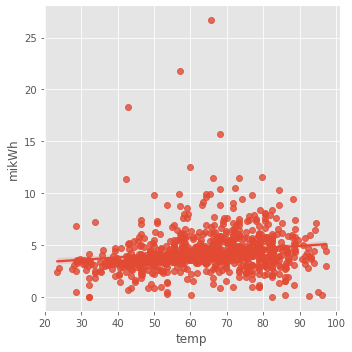

In [24]:
sns.lmplot(y = r'mikWh', x = r'temp', data = trips)


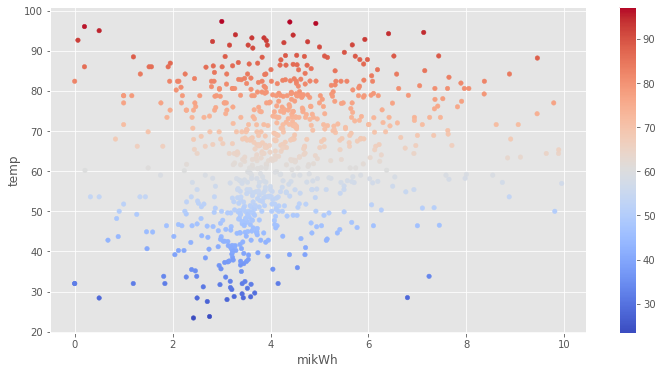

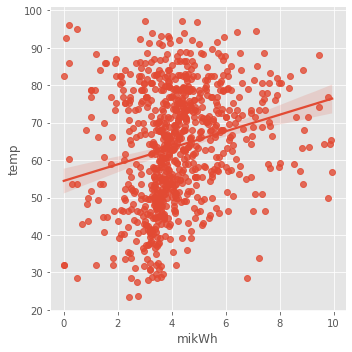

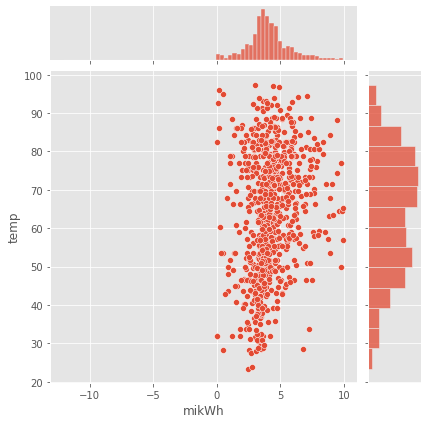

In [25]:
temp = trips[trips[r'mikWh']<10]
temp.plot(r'mikWh', r'temp', kind = 'scatter',\
                                c = trips.loc[trips[r'mikWh']<10,:][r'temp'],\
                                colormap = 'coolwarm',  alpha = 1, sharex=False)


sns.lmplot(x = r'mikWh', y = r'temp', data = temp)
sns.jointplot(x = r'mikWh', y = r'temp', data = temp)
# temp.plot(x, a*x+b) 




In [26]:
# import numpy as np
# import matplotlib.pyplot as plt

# #define data
# x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# y = np.array([2, 5, 6, 7, 9, 12, 16, 19])

# #find line of best fit
# a, b = np.polyfit(x, y, 1)

# #add points to plot
# plt.scatter(x, y, color='purple')

# #add line of best fit to plot
# plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

# #add fitted regression equation to plot
# plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

# REMOVE 0.00 mile trips

In [27]:
trips

,start_date,end_date,duration,distance,electricity_used,MPGe,mikWh,start_soc,end_soc,temp,start_range,end_range
0,2022-02-24 08:25:56,2022-02-24 09:32:13,01:06:17,45.54,12.64,121.44,3.602848,0.0000,0.0000,31.81,0.000000,0.000000
3,2022-02-24 18:00:42,2022-02-24 19:06:38,01:05:56,45.57,13.19,116.46,3.454890,0.5608,0.3216,36.96,127.875155,73.332115
4,2022-02-26 09:50:22,2022-02-26 10:03:52,00:13:30,5.36,1.67,108.13,3.209581,0.7726,0.7451,30.52,163.661662,157.836273
5,2022-02-26 10:04:49,2022-02-26 10:12:17,00:07:28,3.34,0.97,116.10,3.443299,0.7451,0.7294,28.45,169.329736,165.761790
6,2022-02-26 10:28:40,2022-02-26 10:31:18,00:02:38,0.45,0.18,84.94,2.500000,0.7294,0.7216,28.40,120.351000,119.064000
...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2022-11-29 07:59:27,2022-11-29 08:25:02,00:25:35,17.60,5.89,100.71,2.988115,1.0000,0.8980,35.67,197.215620,177.099626
1086,2022-11-29 15:38:54,2022-11-29 16:12:07,00:33:13,14.31,4.03,119.67,3.550868,0.8980,0.8392,39.10,210.452873,196.672663
1087,2022-11-29 18:09:27,2022-11-29 18:58:13,00:48:46,33.47,9.83,114.76,3.404883,0.8392,0.6706,35.00,188.586936,150.698760
1088,2022-11-30 08:17:23,2022-11-30 08:45:27,00:28:04,17.47,5.57,105.74,3.136445,1.0000,0.9058,41.45,207.005386,187.505479


# NEED TO FIX DURATION dtype

In [28]:



# gas_prices['Duration'] = pd.datetime.time to_datetime(gas_prices['date'])
# gas_prices.dtypes

### gas_prices

In [29]:
# Reading in NY State Weekly Gas Prices
gas_prices = pd.read_csv('data/RAW-NY_Gas_prices_REGULAR_FORMULA_Weekly_Retail_Gasoline_and_Diesel_Prices.csv'\
                    , skiprows = 7, names = ['date','price'])
# gas_prices.value_counts
gas_prices.head()
# gas_prices.describe()

,date,price
0,11/28/2022,3.663
1,11/21/2022,3.735
2,11/14/2022,3.808
3,11/7/2022,3.832
4,10/31/2022,3.741


In [30]:
# Converting column 'date' to datetime
gas_prices['date'] = pd.to_datetime(gas_prices['date'])
gas_prices.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [31]:
gas_prices = gas_prices[gas_prices['date'].dt.year == 2022]
gas_prices.head()

,date,price
0,2022-11-28,3.663
1,2022-11-21,3.735
2,2022-11-14,3.808
3,2022-11-07,3.832
4,2022-10-31,3.741


<AxesSubplot:xlabel='date'>

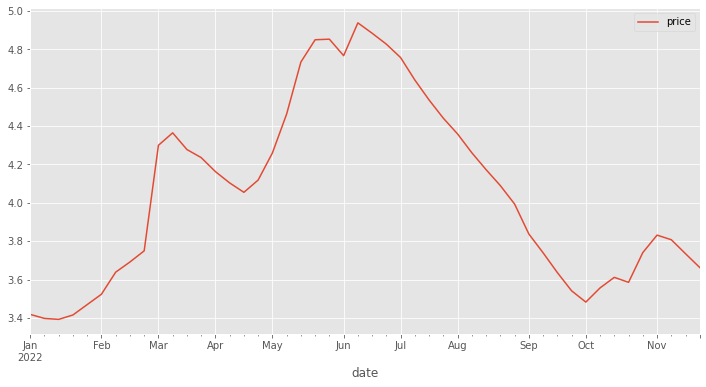

In [32]:
x = gas_prices['date']
y = gas_prices['price']

gas_prices.plot(x = 'date', y ='price', kind = 'line')




# Fill in missing dates, and copy values

In [33]:

idx = pd.date_range('01-01-2022', '11-28-2022')

s = pd.Series(gas_prices.to_dict)

s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
s

2022-01-01    0
2022-01-02    0
2022-01-03    0
2022-01-04    0
2022-01-05    0
             ..
2022-11-24    0
2022-11-25    0
2022-11-26    0
2022-11-27    0
2022-11-28    0
Freq: D, Length: 332, dtype: object

# boxplot: Gas vs electrc

Electricity Prices

In [34]:
# #
# supply_chrg = 9.7383 #/kwh
# deliv_chrg = 13.9280 #/kwh
# sys_ben_chrg = .5005 #/kwh
# sales_tax = .07 # 7% over total